# Modelo de regresión lineal múltiple para la predicción de nivel escalado de presión sonora con datos de la NASA

## Introducción

En este trabajo entrenaré y evaluaré, con parámetros estadísticos pertinentes, un modelo de regresión lineal múltiple que busca predecir niveles de presión sonora detectada utilizando una base de datos originalmente publicada por la NASA [1]. Contiene 6 mediciones para cada una de las 1052 observaciones registradas en ella. Se encuentran: 

- Frecuencia (Hz)
- Ángulo de ataque (grados)
- Longitud de cuerda geométrica (m)
- Velocidad de flujo libre (m/s)
- Espesor del deplazamiento en el lado de succión (m)
- Nivel escalado de presión sonora (dB) 

De estos, se menciona que la única salida es el nivel escalado de presión sonora; todos los demás son entradas en el experimento [1]. 

En concordancia con lo especificado, consideraré como variable de interés (de salida) la presión sonora, y las demás variables como variables de entrada.

Disclaimer: se utilizó la ayuda de inteligencia artificial generativa para parte de la realización de la *Figura 1* de este trabajo

## Análisis

Se empieza importando librerías pertinentes y analizando algunos datos con los que se cuenta:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
df = pd.read_csv("NASA.csv")
print(f"Dimensiones de datos: {df.shape}")
print(f"Primeros 15 datos:\n\n {df.head(15)}")

Dimensiones de datos: (1503, 6)
Primeros 15 datos:

     frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14

Asignaremos 70% de los datos originales a los datos de entrenamiento, y el 30% restante a los datos de prueba

In [3]:
train, test = train_test_split(df, train_size=0.7)
print(f"Dimensiones de datos de entrenamiento: {train.shape}")
print(f"Dimensiones de datos de prueba: {test.shape}")
if(train.shape[0] + test.shape[0] != df.shape[0]):
    print("Error: distribucion incorrecta de datos de entrenamiento y prueba")
    sys.exit(1)

Dimensiones de datos de entrenamiento: (1052, 6)
Dimensiones de datos de prueba: (451, 6)


Ahora se entrena el modelo

In [4]:
xtrain = train.drop('presion', axis=1)
ytrain = train.presion
model = sm.OLS(ytrain, sm.add_constant(xtrain))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     202.9
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          3.27e-151
Time:                        12:46:42   Log-Likelihood:                -3160.8
No. Observations:                1052   AIC:                             6334.
Df Residuals:                    1046   BIC:                             6363.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4466      0.670    197.643      0.0

Dado que los p-values no se aprecian, veámoslos más a detalle

In [5]:
print(results.pvalues)

const          0.000000e+00
frecuencia    9.718682e-101
angulo         4.937054e-17
longitud       1.846248e-60
velocidad      6.772177e-23
espesor        1.484180e-16
dtype: float64


In [6]:
print("Considerando la significancia alpha = 0.05 para el analisis,\ndado que para todas las variables se cumple que el p-value es menor a alpha, \nvemos que todas tienen una asociacion significativa \ncon la presion sonora detectada (la variable de salida)")
print("\nAdemas, dado que es aquella cuyo coeficiente tiene\nmayor magnitud destaco que la variable 'espesor'\nes la mas importante del modelo")

Considerando la significancia alpha = 0.05 para el analisis,
dado que para todas las variables se cumple que el p-value es menor a alpha, 
vemos que todas tienen una asociacion significativa 
con la presion sonora detectada (la variable de salida)

Ademas, dado que es aquella cuyo coeficiente tiene
mayor magnitud destaco que la variable 'espesor'
es la mas importante del modelo


Teniendo lo anterior en cuenta, se calculará el $RSE$ y la $R^2$ del modelo para los datos de entrenamiento y los datos de prueba.

In [7]:
# datos de entrenamiento
rseTrain = results.scale**0.5
r2Train = results.rsquared

# datos de prueba
xtest = test.drop("presion", axis=1)
ytest = test.presion
yhatTest = results.predict(sm.add_constant(xtest))

mTest = xtest.shape[1]
nTest = xtest.shape[0]

rssTest = sum((ytest-yhatTest)**2)
rseTest = np.sqrt(rssTest/(nTest - mTest - 1))
tssTest = sum((ytest - np.mean(ytest))**2)
r2Test = 1 - rssTest/tssTest
print(f"RSE train: {rseTrain} RSE test: {rseTest}")
print(f"R^2 train: {r2Train} R^2 test: {r2Test}")

RSE train: 4.8962339992602635 RSE test: 4.647225237218506
R^2 train: 0.49232964241782473 R^2 test: 0.5637875899863728


Esto es notable. Aun cuando podemos tener 95% de confianza (por la significancia de nuestro análisis) de que hay una gran asociación significativa entre las variables de entrada y la variable de salida, dado que $R^2$ es menor que $0.7$ (un criterio decente que usan diferentes investigadores), vemos que el modelo *no es capaz de explicar adecuadamente el comportamiento de los datos obtenidos*. 

Ahora se visualizara la diferencia entre los datos que se tienen de presion sonora detectada con las predicciones del modelo entrenado

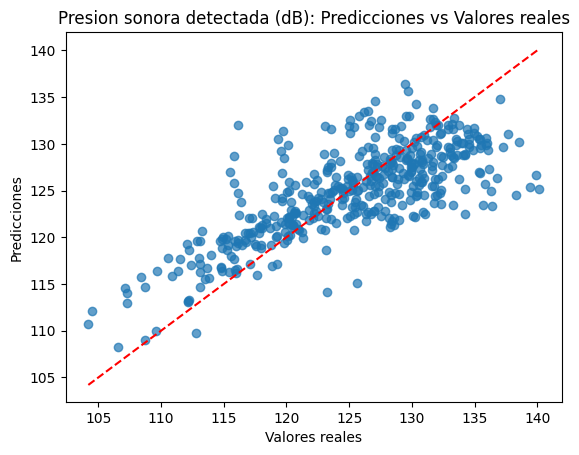

In [8]:
%matplotlib inline

plt.title("Presion sonora detectada (dB): Predicciones vs Valores reales")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.scatter(y=yhatTest, x=ytest, alpha = 0.7)

# Encontrar el rango para la línea
min_val = min(ytest.min(), yhatTest.min())  # Mínimo entre ambos conjuntos
max_val = max(ytest.max(), yhatTest.max())  # Máximo entre ambos conjuntos

# Crear los puntos de la línea con pendiente 1
line_x = np.array([min_val, max_val])
line_y = np.array([min_val, max_val])

# Graficar la línea con pendiente 1
plt.plot(line_x, line_y, color='red', linestyle='--', label="y = x")
plt.show()

<font size="4">Figura 1: *Presion sonora detectada (dB): Predicciones vs Valores reales.* La linea punteada roja muestra una linea recta con pendiente de 1 </font>

## Conclusiones

Si bien los valores $p$ de las variables de entrada nos muestran que hay una asociación muy significativa con la presión sonora detectada, tanto el coeficiente de $R^2$ obtenido como la *Figura 1* muestran que el modelo no explica adecuadamente el comportamiento de los datos. Después de todo, mientras más se acerque la $R^2$ a $1$, más deberían asemejarse los puntos de la gráfica a una línea recta como la de la *Figura 1*, una línea de pendiente $1$

¿Esto qué nos enseña? Nos enseña que debe haber más información sobre lo que impacte y contribuya al comportamiento de la presión sonora detectada. Muy probablemente haga falta considerar más variables para acercarnos a mejores predicciones, o algún otro factor aleatorio que esté impactando en la variable de salida.

## Referencias
[1] UCI Machine Learning Repository. (2014). Recuperado 30 de enero 2025 de: https://archive.ics.uci.edu/dataset/291/airfoil+self+noise